In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("datasets/customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [8]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

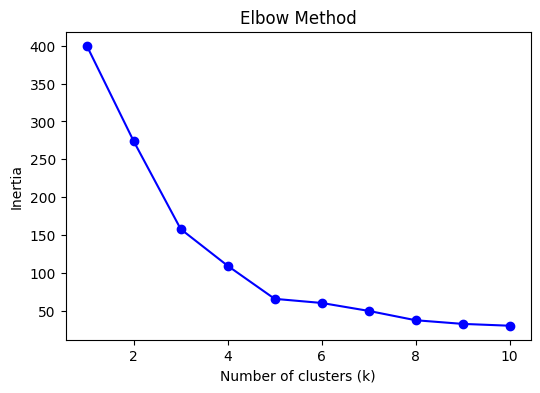

In [17]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(x)

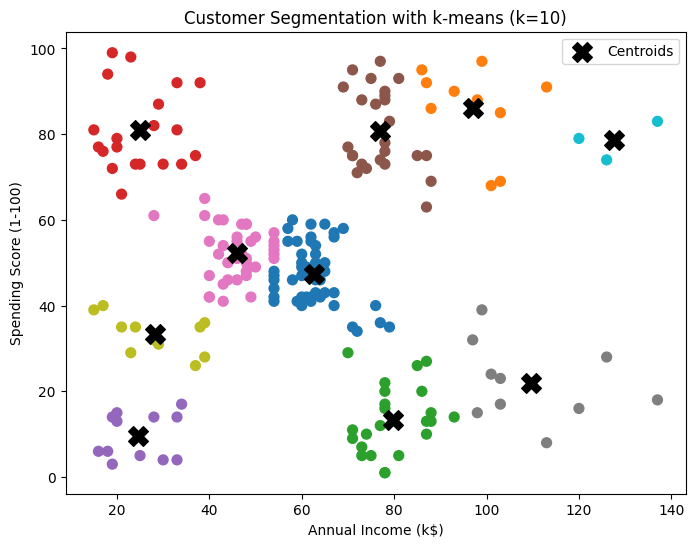

In [25]:
centers = std_scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='tab10', s=50)
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with k-means (k=10)')
plt.legend()
plt.show()

In [21]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

cluster_counts = df["Cluster"].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.229167           62.583333               47.291667
1        32.636364           97.090909               86.090909
2        40.217391           79.739130               13.391304
3        24.850000           24.950000               81.000000
4        48.750000           24.583333                9.583333
5        32.760000           76.960000               80.800000
6        43.135135           45.891892               52.378378
7        41.000000          109.700000               22.000000
8        41.363636           28.181818               33.272727
9        32.333333          127.666667               78.666667

Number of customers in each cluster:
Cluster
0    48
1    11
2    23
3    20
4    12
5    25
6    37
7    10
8    11
9     3
Name: count, dtype: int64


In [22]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

def label_cluster(row):
    income = row["Annual Income (k$)"]
    score = row["Spending Score (1-100)"]
    
    if income > 70 and score > 70:
        return "High Income & High Spending"
    elif income > 70 and score <= 70:
        return "High Income & Low Spending"
    elif income <= 70 and score > 70:
        return "Low Income & High Spending"
    else:
        return "Low Income & Low Spending"

df["Cluster_Label"] = df.apply(label_cluster, axis=1)
print(df["Cluster_Label"].value_counts())


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.229167           62.583333               47.291667
1        32.636364           97.090909               86.090909
2        40.217391           79.739130               13.391304
3        24.850000           24.950000               81.000000
4        48.750000           24.583333                9.583333
5        32.760000           76.960000               80.800000
6        43.135135           45.891892               52.378378
7        41.000000          109.700000               22.000000
8        41.363636           28.181818               33.272727
9        32.333333          127.666667               78.666667
Cluster_Label
Low Income & Low Spending      105
High Income & Low Spending      41
High Income & High Spending     33
Low Income & High Spending      21
Name: count, dtype: int64
